In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import figure
import cv2

In [2]:
class SelfOrginizingMap:
    def __init__(self, learning_rate, data, neighborhood, n, epoch):
        self.learning_rate = learning_rate
        self.data = data
        self.neighborhood = neighborhood
        self.n = n
        self.epoch = epoch
        
    def print_graph(self, nlist, slist):
        figure(figsize=(15, 8))
        X=[]
        Y=[]
        for i in range(len(nlist)):
            for j in range(len(nlist[i])):
                X.append(nlist[i][j][0])
                Y.append(nlist[i][j][1])
                plt.annotate((i, j),(nlist[i][j][0],nlist[i][j][1]))
                plt.plot(nlist[i][j][0],nlist[i][j][1],'*r')
        Xp=[]
        Yp=[]
        for n in slist:
            Xp.append(n[0])
            Yp.append(n[1])
        plt.plot(Xp,Yp,'.')
        plt.show()
    
    def check_new(self, new):
        if new[0]>1:
            new[0]=1
        if new[0]<0:
            new[0]=0
        if new[1]>1:
            new[1]=1
        if new[1]<0:
            new[1]=0
        return new

    def make_nlist(self):
        nueron_lst = []
        row = []
        xarr = np.arange(self.n-1)
        xarr = np.true_divide(xarr, self.n-1)
        xarr = np.append(xarr, 1)

        yarr = np.arange(self.n-1)
        yarr = np.true_divide(yarr, self.n-1)
        yarr = np.append(yarr, 1)
        for j in range(self.n):
            row = []
            for i in range(self.n):
                row.append([xarr[i] ,yarr[j]])
            nueron_lst.append(row)
        return nueron_lst

    def SOM(self):
        nueron_lst = self.make_nlist()
        mid = 10
#         num = 5
#         alpha = 0.9

        ker = cv2.getGaussianKernel(mid * 2 + 1,-1)
        ker = ker.dot(ker.T)

        sampled_points = []
        for i in range(self.epoch):
            print("iteration ",i)
            self.print_graph(nueron_lst, sampled_points)
            if i > 0 and i % 7 == 0:
                self.learning_rate /= .5
                self.neighborhood -= 1
            sampled_points = []
            data = self.data.sample(frac=1)
            for index, row in data.iterrows():
                sampled_points.append(np.array([row[0], row[1]]))
                small_dist = np.inf

                # find closest nueron
                for k in range(len(nueron_lst)):
                    for r in range(len(nueron_lst[k])):
                        dist = np.sqrt((row[0] - nueron_lst[k][r][0]) ** 2 + (row[1] - nueron_lst[k][r][1]) ** 2)
                        if dist < small_dist:
                            small_dist = dist
                            spotrow = k
                            spotcol = r

                # update weights 
                for j in range(spotrow - self.neighborhood, spotrow + self.neighborhood + 1):
                    for k in range(spotcol - self.neighborhood, spotcol + self.neighborhood + 1):
                        if 0 <= j < len(nueron_lst) and 0 <= k < len(nueron_lst[j]):
                            new = nueron_lst[j][k] + self.learning_rate * ker[mid-spotrow+j][mid-spotcol+k] * (sampled_points[-1] - nueron_lst[j][k])
                            nueron_lst[j][k] = new
        print("iteration ",i )
        self.print_graph(nueron_lst, sampled_points)

iteration  0


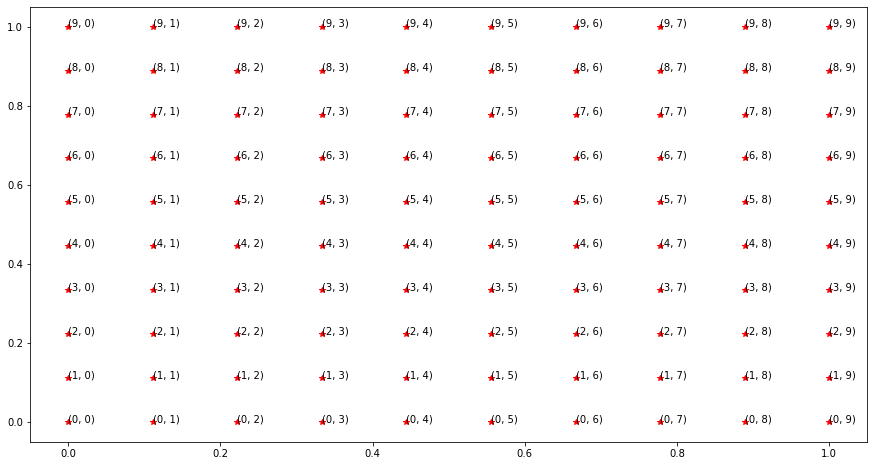

iteration  1


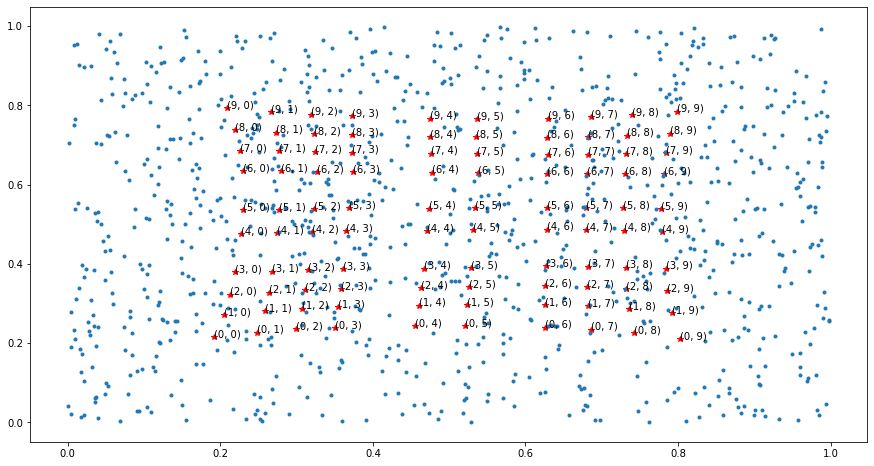

iteration  2


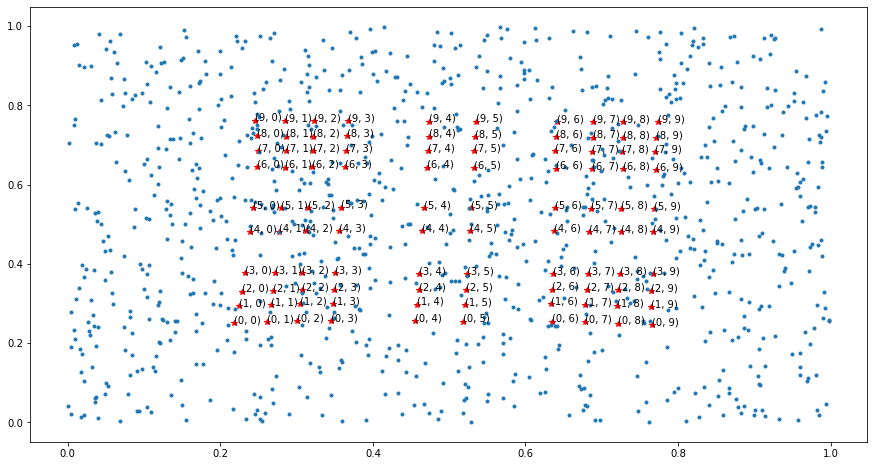

iteration  3


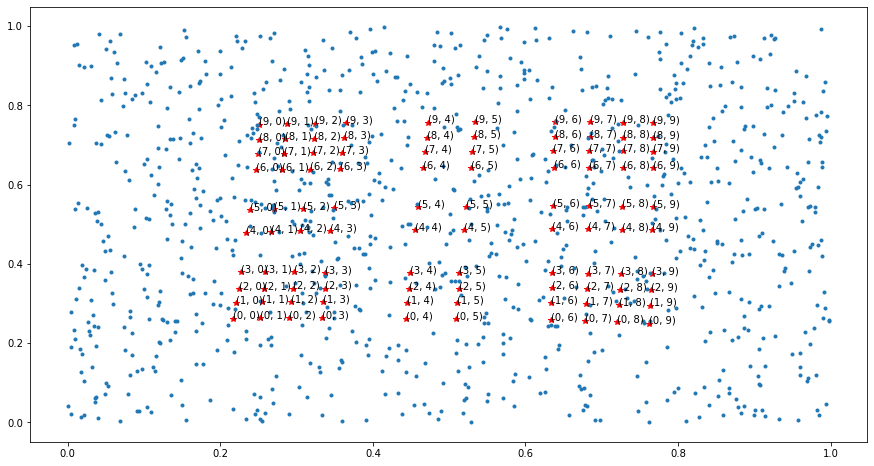

iteration  4


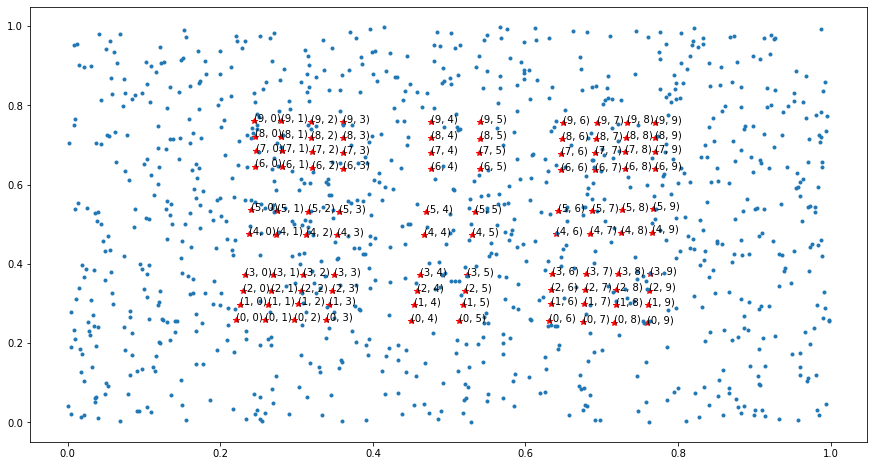

iteration  5


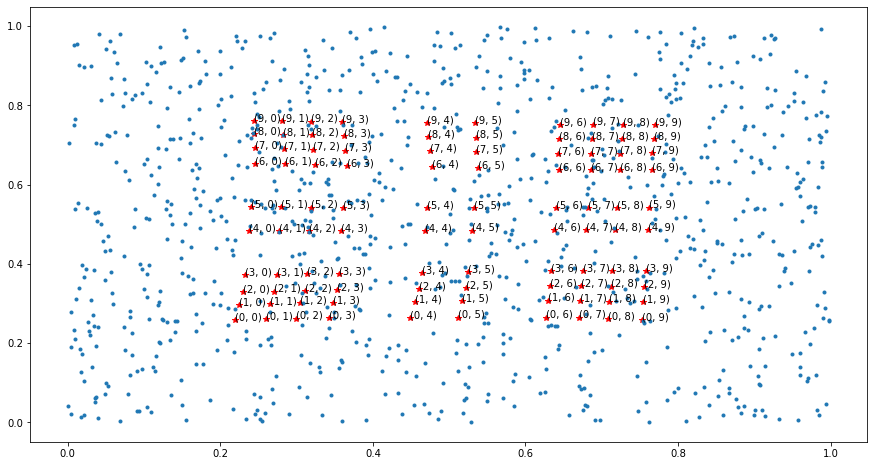

iteration  6


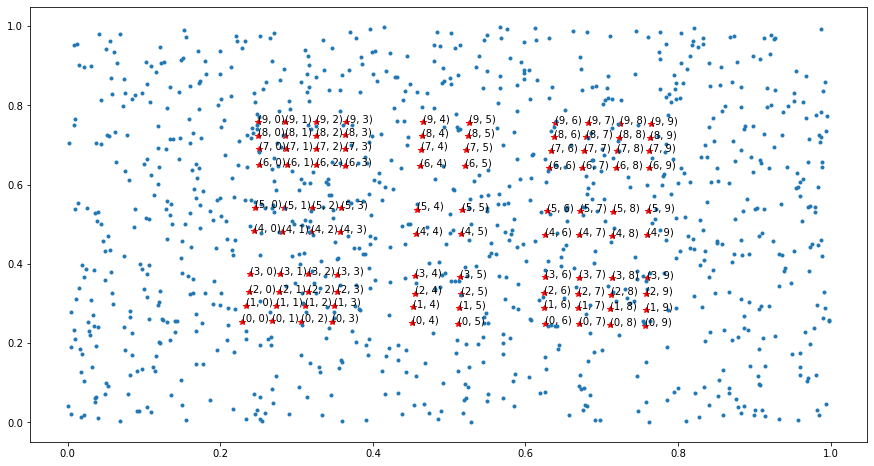

iteration  7


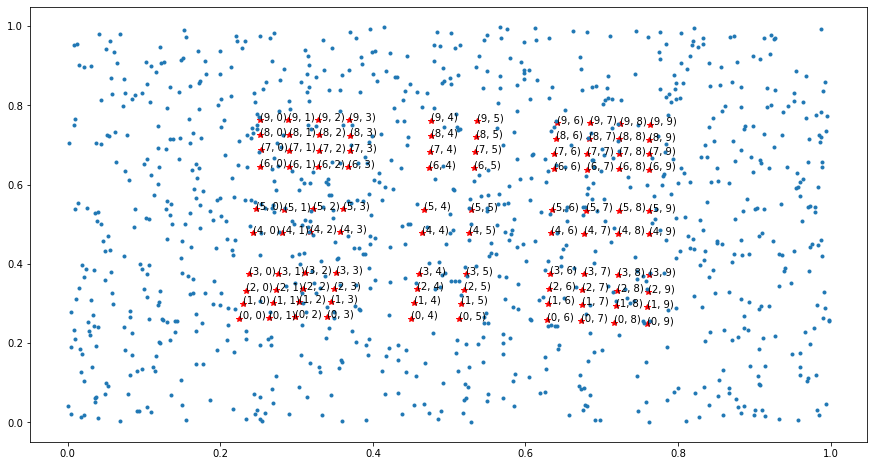

iteration  8


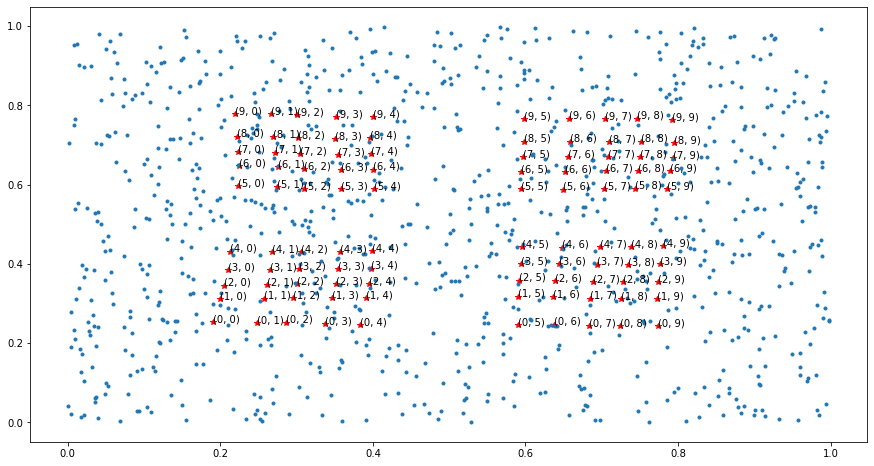

iteration  9


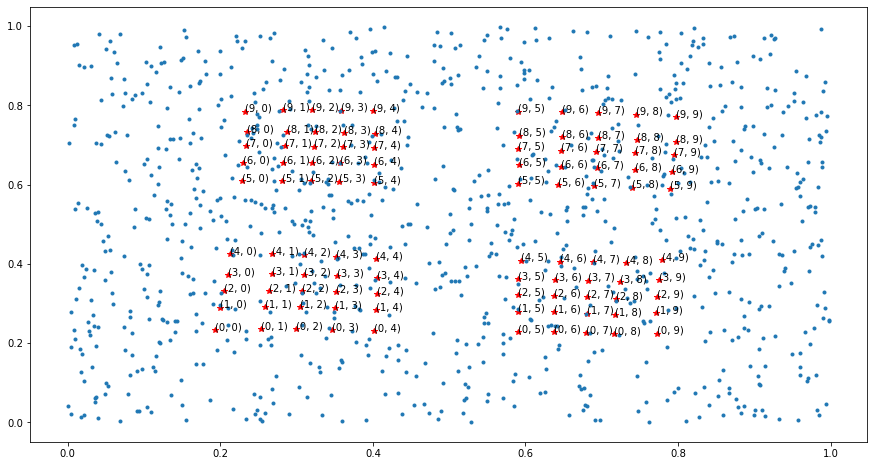

iteration  10


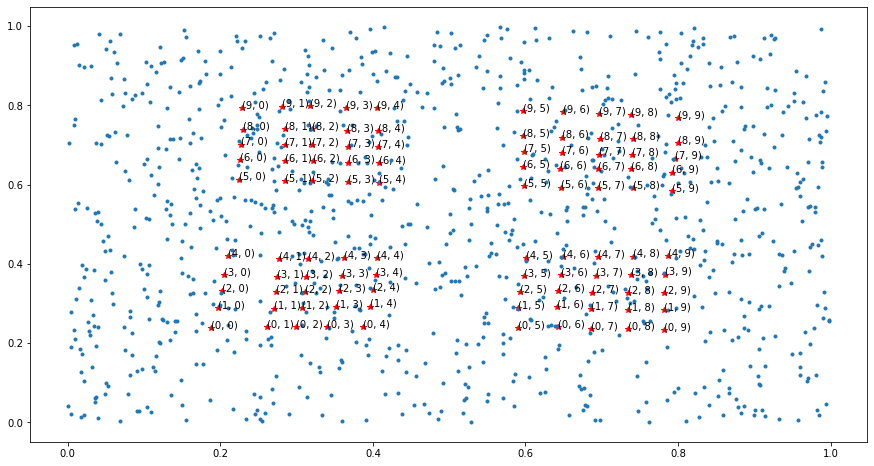

iteration  11


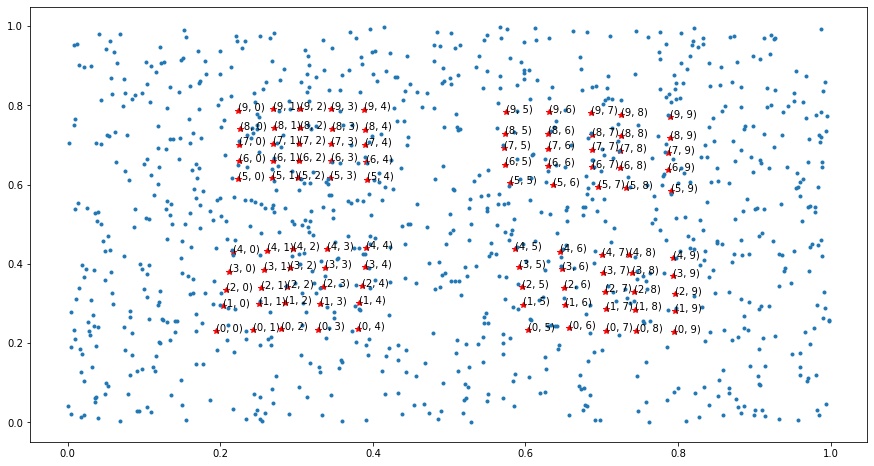

iteration  12


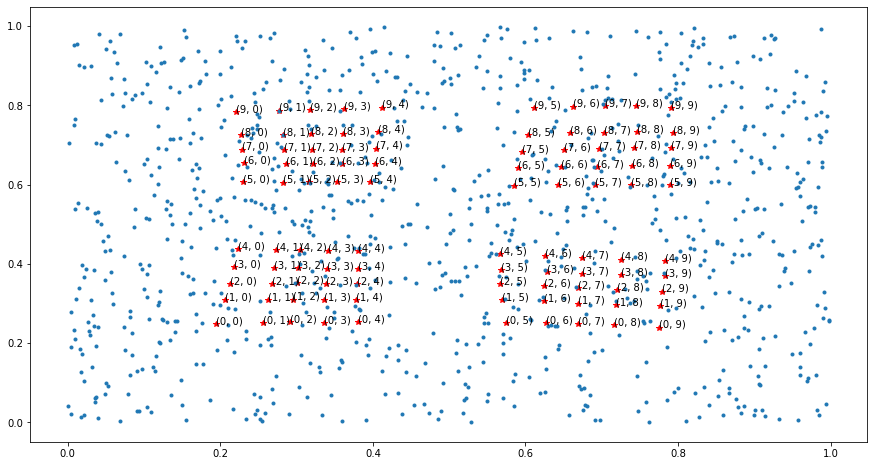

iteration  13


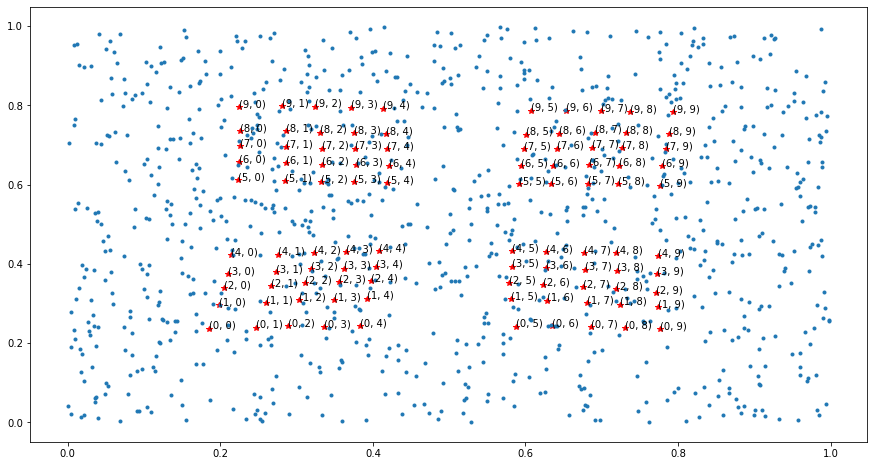

iteration  14


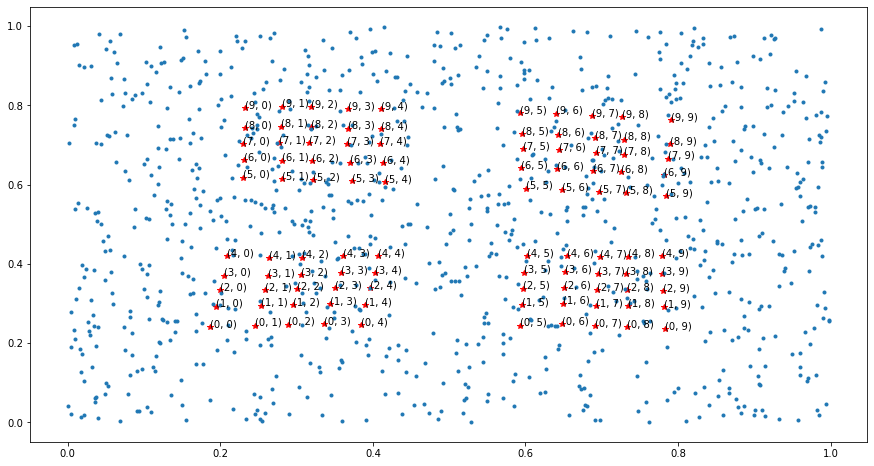

iteration  15


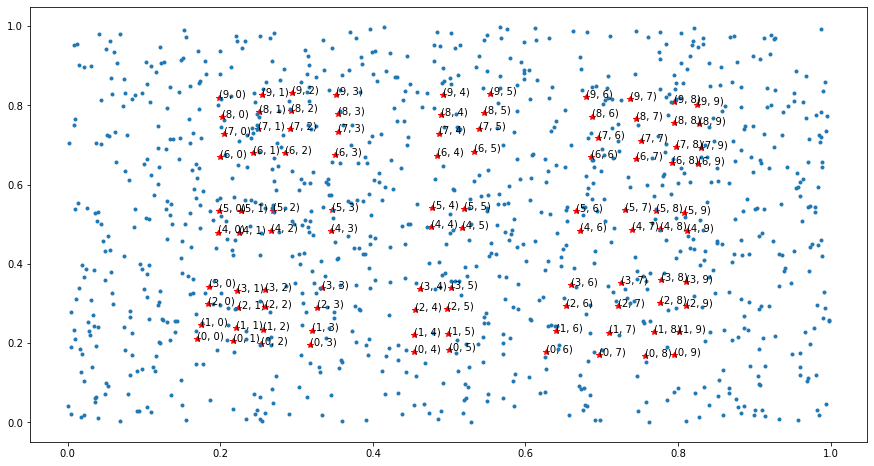

iteration  16


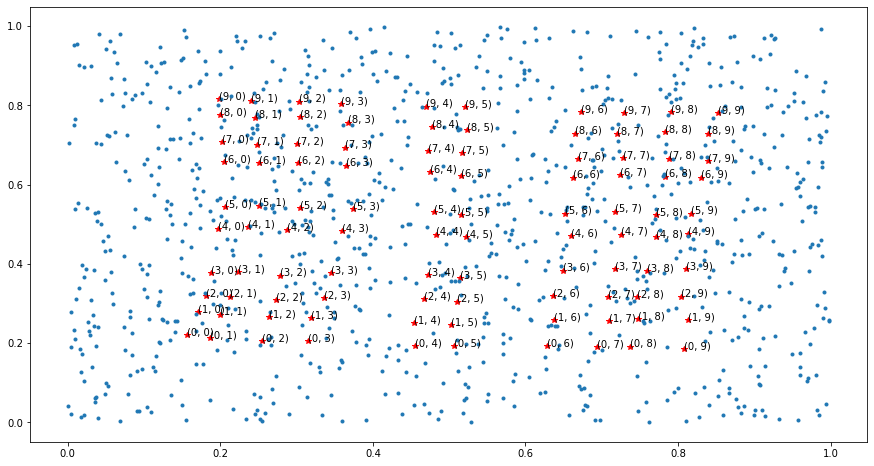

iteration  17


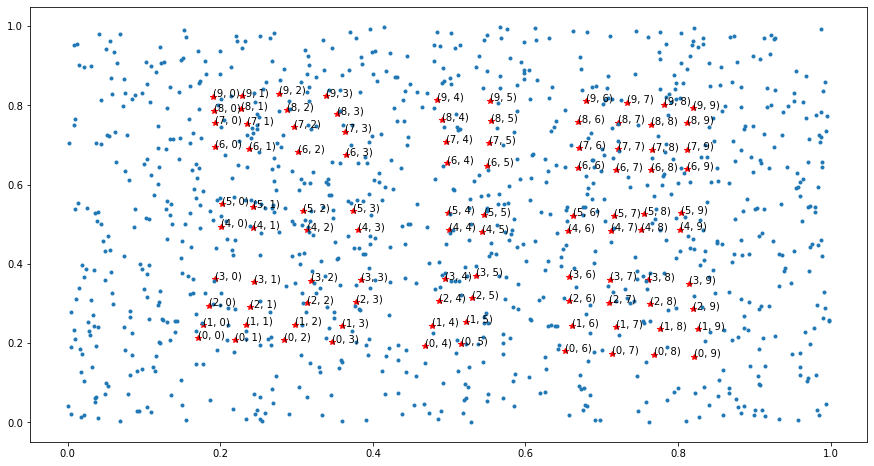

iteration  18


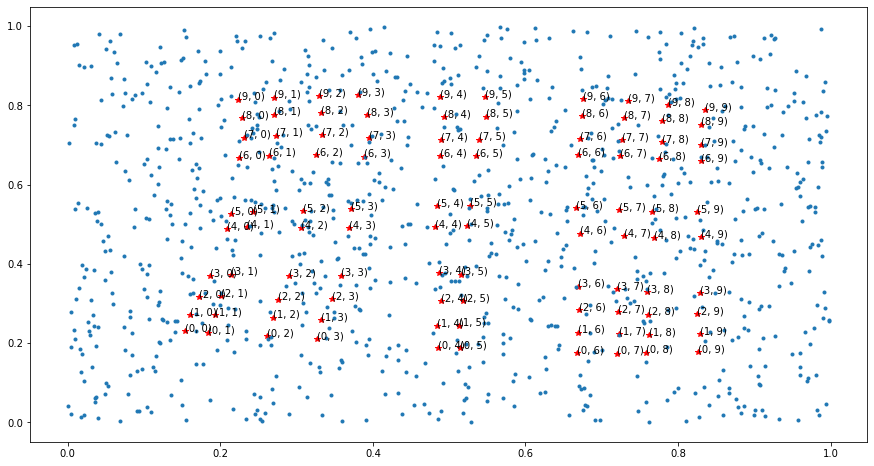

iteration  19


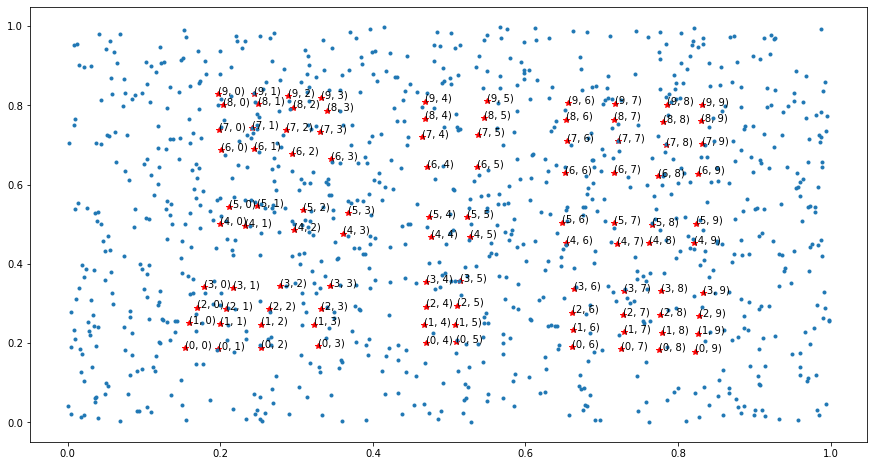

iteration  20


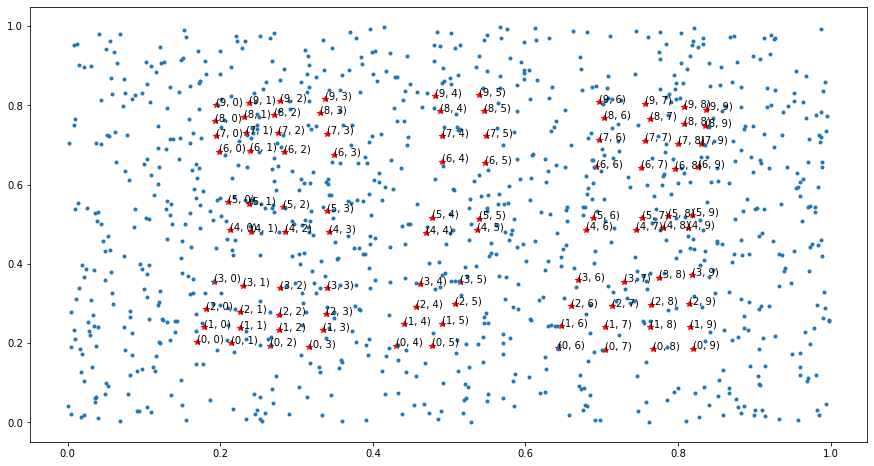

iteration  21


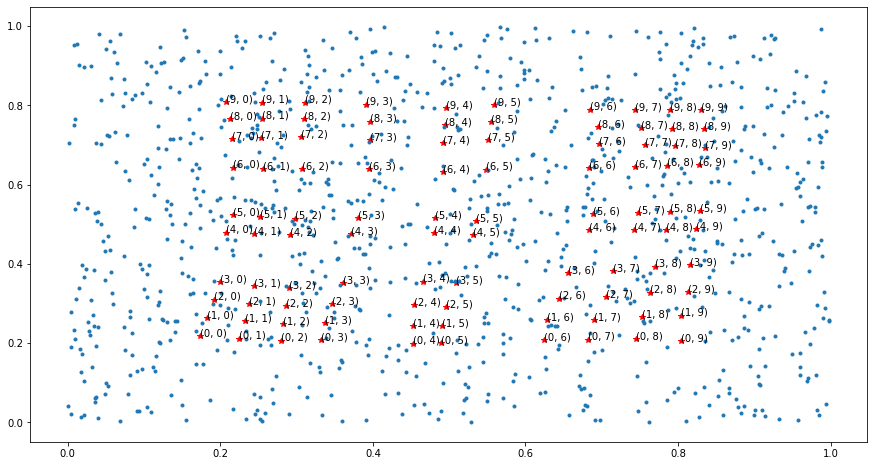

iteration  22


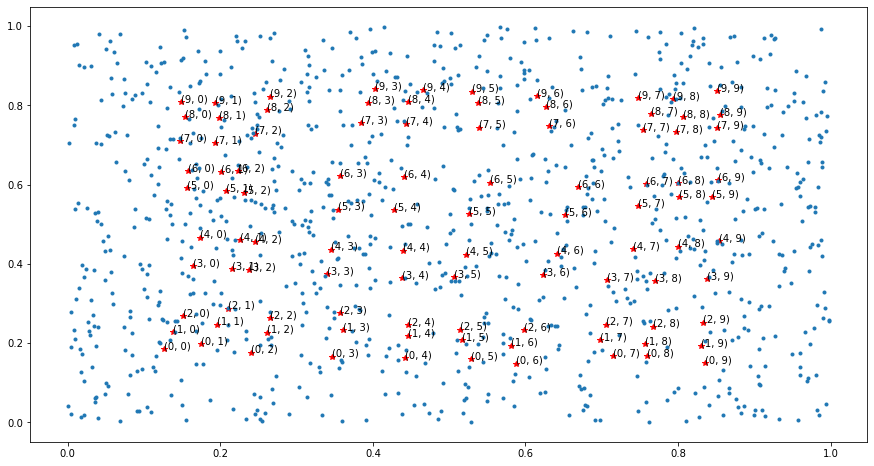

iteration  23


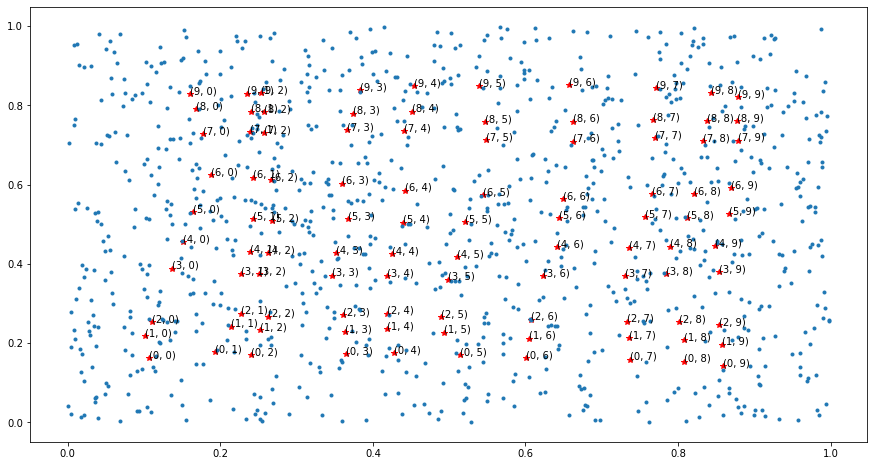

iteration  24


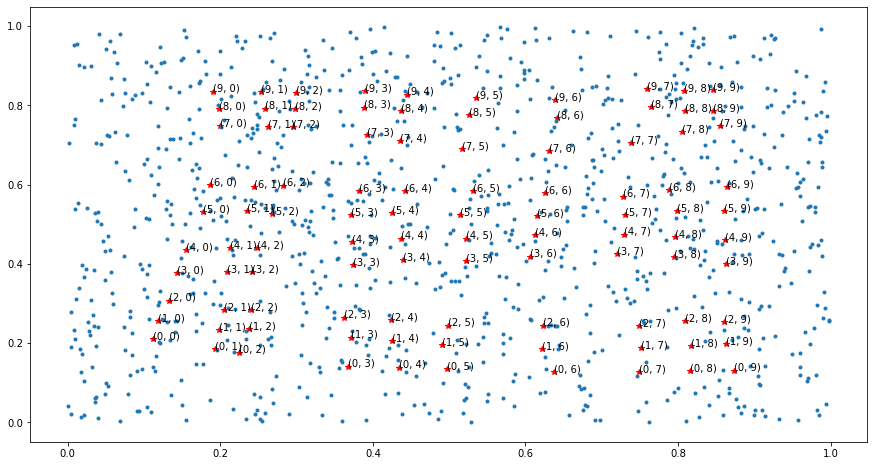

iteration  25


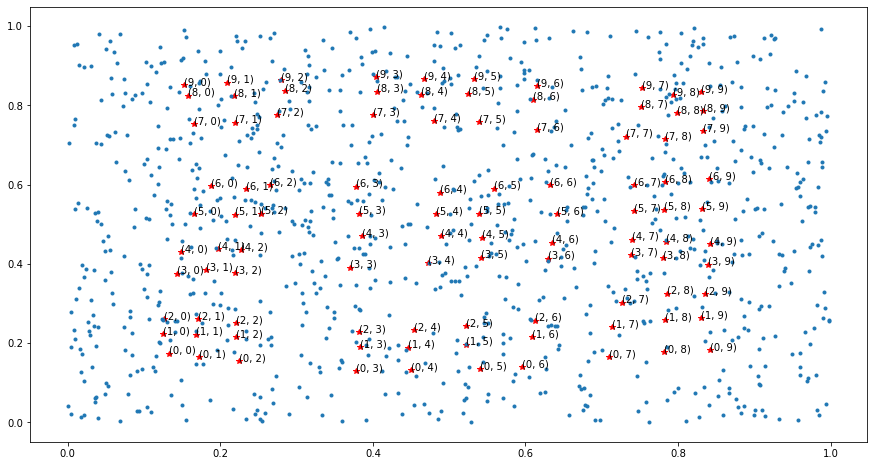

iteration  26


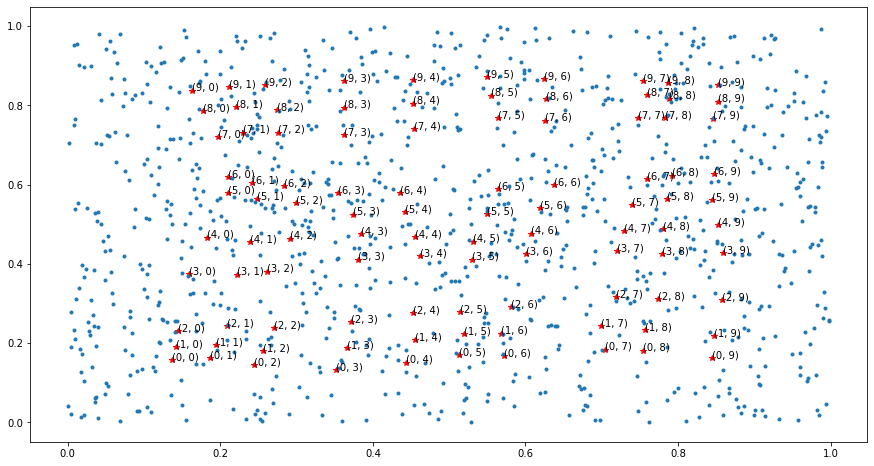

iteration  27


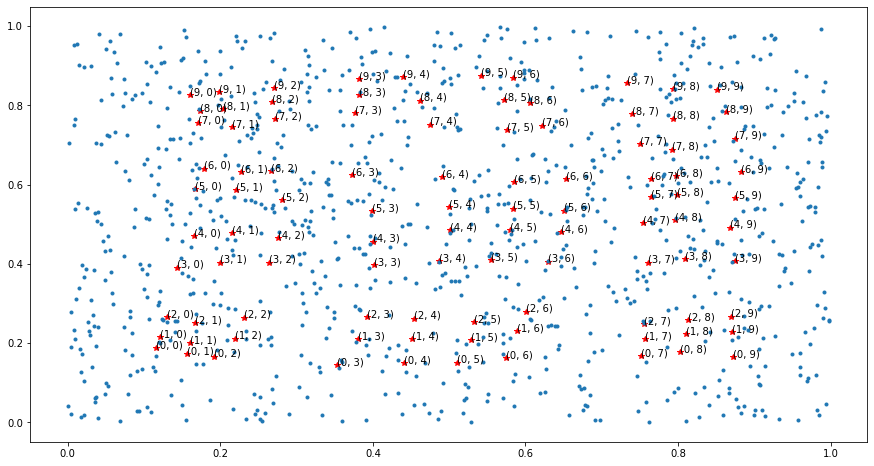

iteration  28


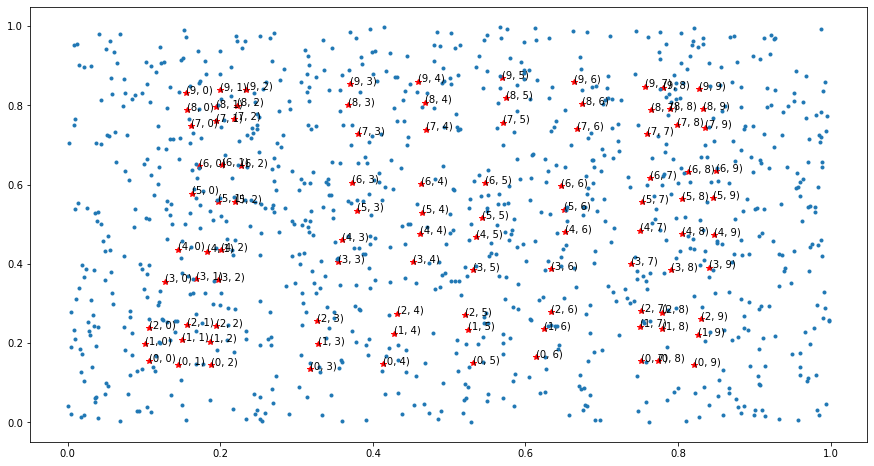

iteration  29


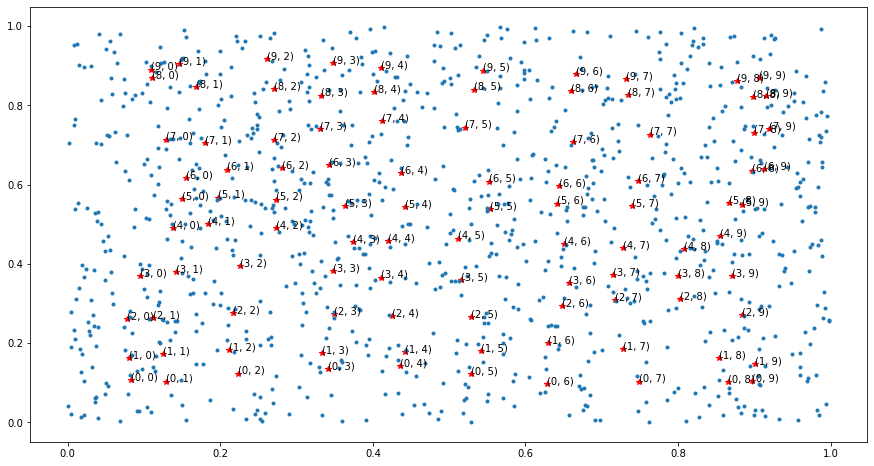

iteration  30


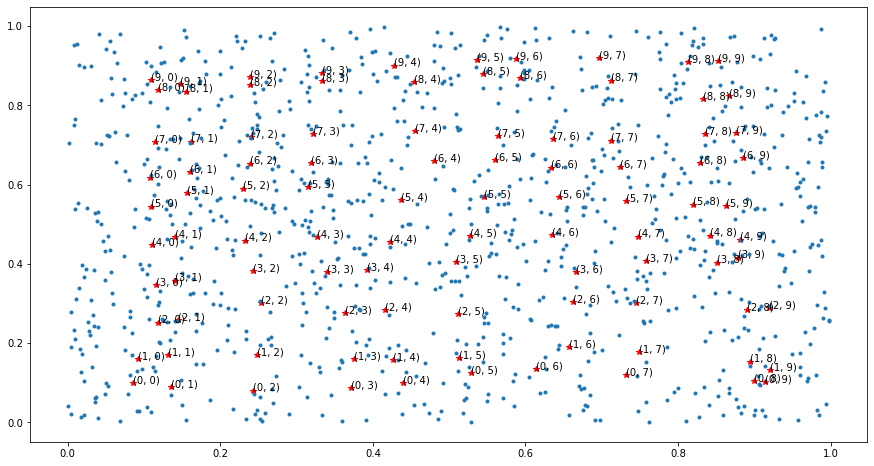

iteration  31


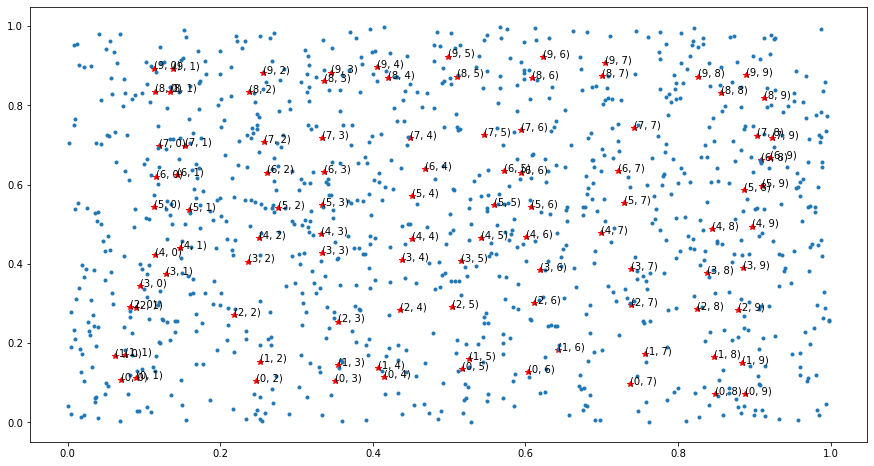

iteration  32


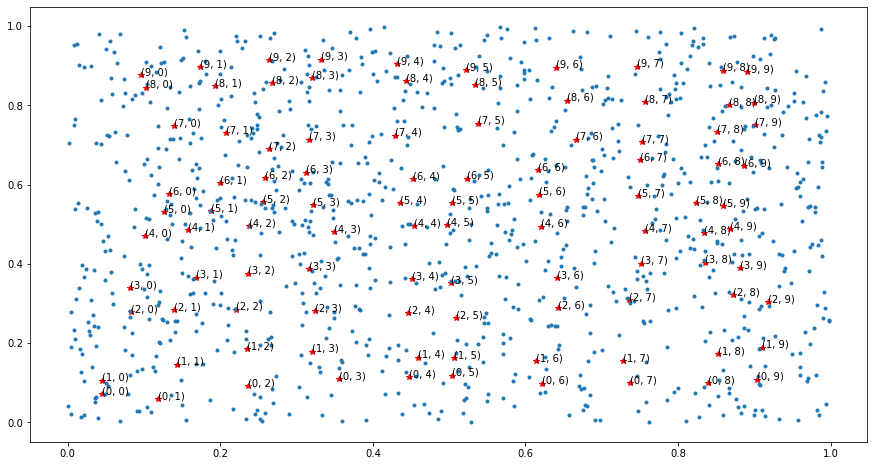

iteration  33


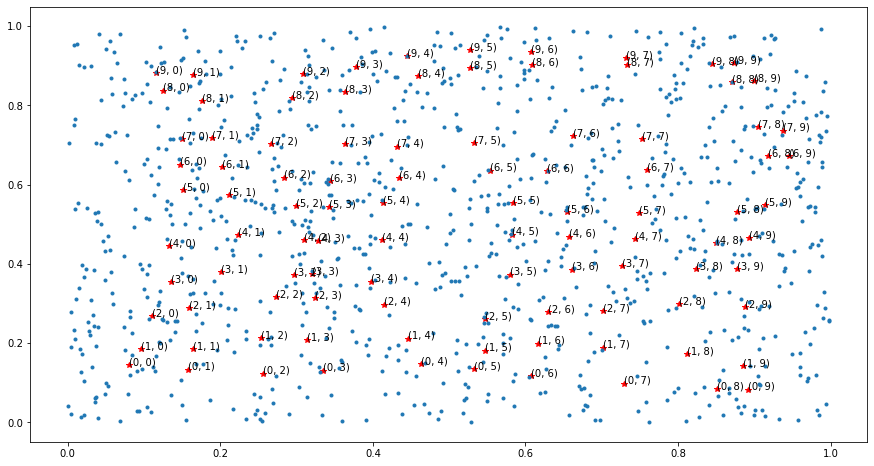

iteration  34


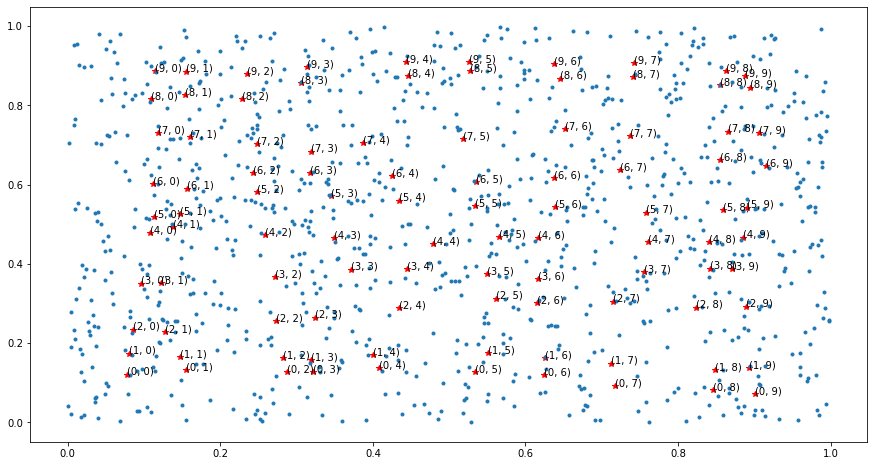

iteration  35


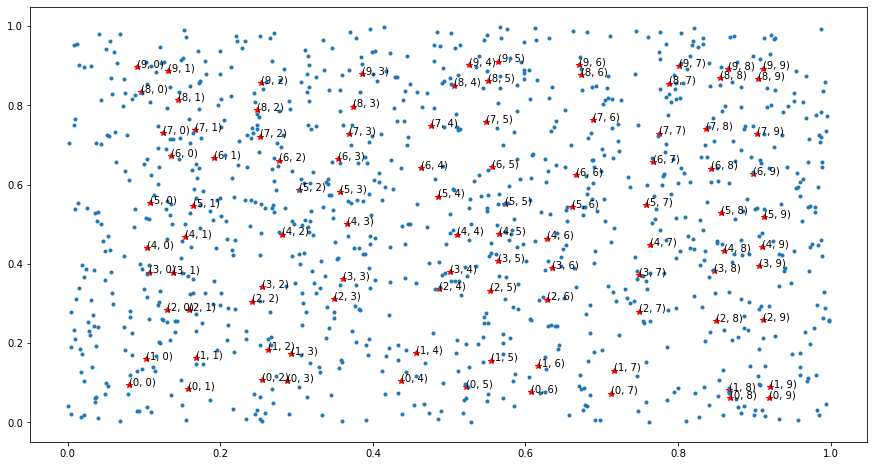

iteration  36


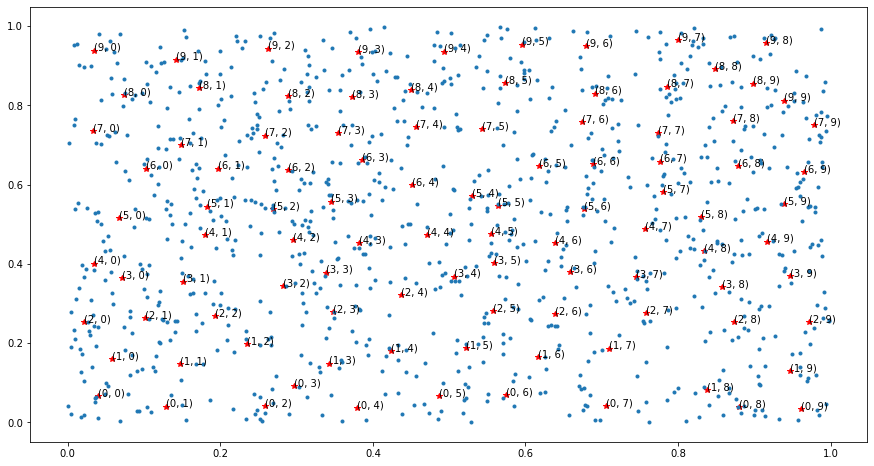

iteration  37


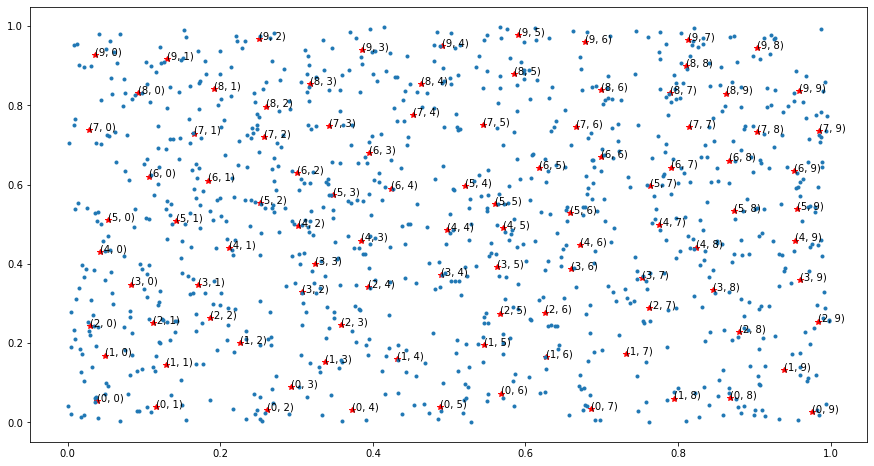

iteration  38


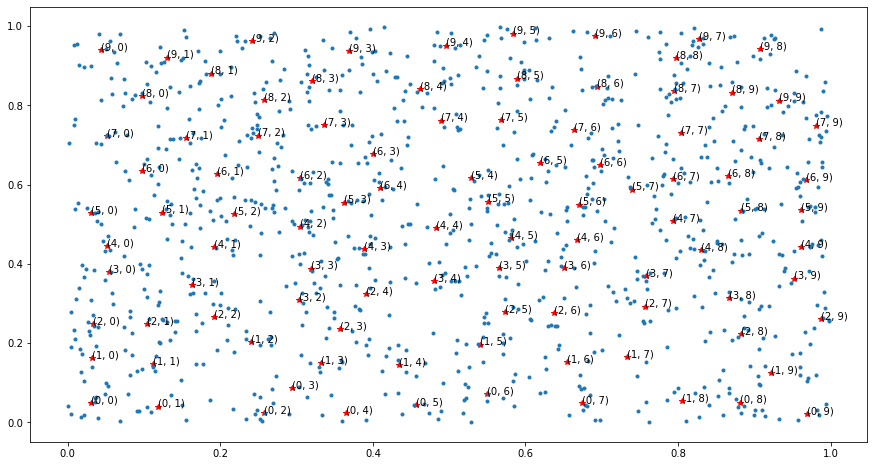

iteration  39


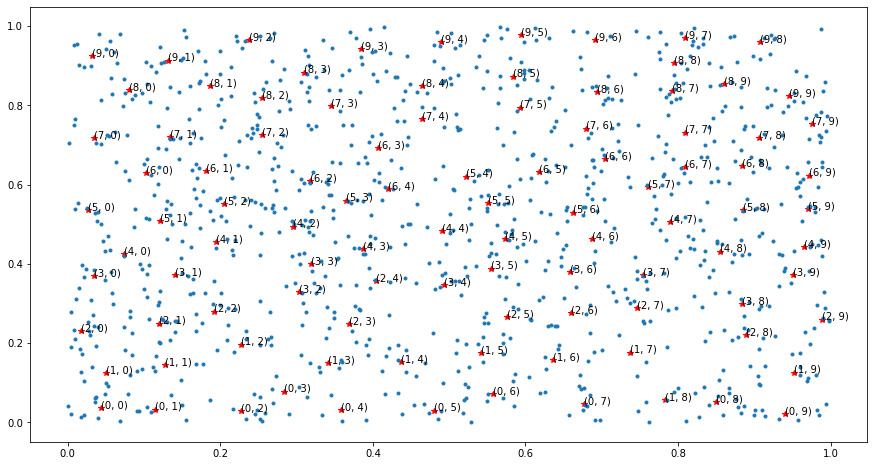

iteration  39


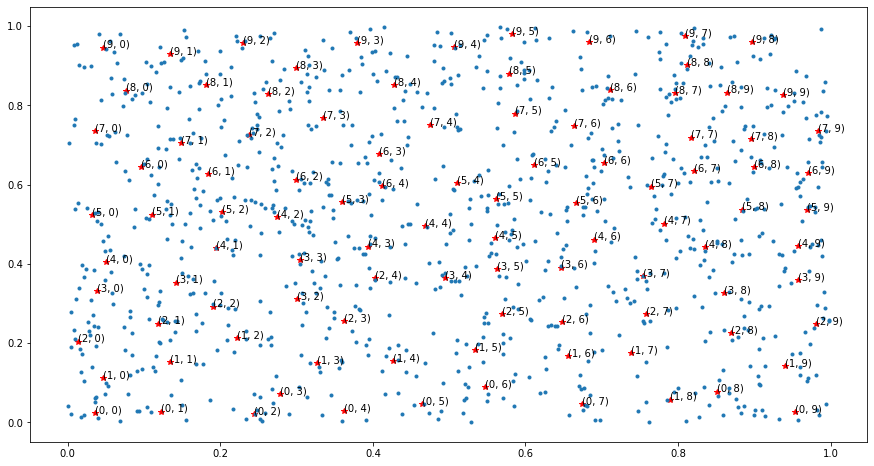

In [4]:
data = pd.DataFrame()
random.seed(1)
for i in range(1000):
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    data[i] = [randX, randY]
data = data.T

som1 = SelfOrginizingMap(learning_rate=0.7, data=data, neighborhood=5, n=10, epoch=40) 
som1.SOM()

In [ ]:
data_sq = pd.DataFrame()
random.seed(1)
for i in range(1000):
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    if randX <= 0.5:
        randX = randX ** 2
    else:
        randX = randX ** 0.5
    if randY <= 0.5:
        randY = randY ** 2
    else:
        randY = randY ** 0.5
    data_sq[i] = [randX, randY]
data_sq = data_sq.T

som_sq = SelfOrginizingMap(learning_rate=0.6, data=data_sq, neighborhood=5, n=10, epoch=10) 
som_sq.SOM()

In [ ]:
# make doughnut
doughnut = pd.DataFrame()
random.seed(1)
i = 0
while i < 1000:
    randX = random.uniform(-4, 4)
    randY = random.uniform(-4, 4)
    if 2 <= randX ** 2 + randY ** 2 <= 4:
        doughnut[i] = [randX, randY]
        i += 1
doughnut = doughnut.T

som_doughnut = SelfOrginizingMap(learning_rate=0.9, data=doughnut, neighborhood=5, n=10, epoch=40) 
som_doughnut.SOM()

In [ ]:
fin = np.arange(7)
fin = np.true_divide(fin, 7)
fin = np.append(fin,1)
print(fin)



df_4_finger = pd.DataFrame()
df_3_finger = pd.DataFrame()
random.seed(1)
#hand
i = 0
while i < 500:
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    if randY <= 0.5:
        df_4_finger[i] = [randX, randY]
        df_3_finger[i] = [randX, randY] 
        i += 1


#pointer
while i < 650:
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    if randY >= 0.5:
        if fin[0] < randX < fin[1]:
            df_4_finger[i] = [randX, randY]
            df_3_finger[i] = [randX, randY] 
            i += 1

#ring
while i < 800:
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    if randY >= 0.5:
        if fin[4] < randX < fin[5]:
            df_4_finger[i] = [randX, randY]
            df_3_finger[i] = [randX, randY] 
            i += 1
            
#pinky
while i<950:
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    if randY>=0.5:
        if fin[6]<randX<fin[7]:
            df_4_finger[i] = [randX, randY]
            df_3_finger[i] = [randX, randY] 
            i+=1

#middle
while i < 1100:
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    if randY >= 0.5:
        if fin[2] < randX < fin[3]:
            df_4_finger[i] = [randX, randY]
            i += 1

df_4_finger = df_4_finger.T
df_3_finger = df_3_finger.T


Xp4 = []
Yp4 = []
for index, row in df_4_finger.iterrows():
    Xp4.append(row[0])
    Yp4.append(row[1])

plt.plot(Xp4,Yp4,'*')
plt.show()

Xp3 = []
Yp3 = []
for index, row in df_3_finger.iterrows():
    Xp3.append(row[0])
    Yp3.append(row[1])

plt.plot(Xp3,Yp3,'*y')
plt.show()